Datos Rayos X

Librerias

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import voigt_profile
from scipy.stats import linregress

Carga Datos

In [4]:
actividad1=pd.read_csv("Actividad 1.csv",sep=',',encoding='utf-8').drop([0,1])
actividad1=actividad1.apply(pd.to_numeric)
actividad2ambiente=pd.read_csv('Actividad 2 ambiente.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2ambiente=actividad2ambiente.apply(pd.to_numeric)
actividad2Al0_02=pd.read_csv('Actividad 2 Al 0.02mm.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Al0_02=actividad2Al0_02.apply(pd.to_numeric)
actividad2Al0_04=pd.read_csv('Actividad 2 Al 0.04.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Al0_04=actividad2Al0_04.apply(pd.to_numeric)
actividad2Al0_06=pd.read_csv('Actividad 2 Al 0.06.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Al0_06=actividad2Al0_06.apply(pd.to_numeric)
actividad2Al0_08=pd.read_csv('Actividad 2 Al 0.08.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Al0_08=actividad2Al0_08.apply(pd.to_numeric)
actividad2Zn0_025=pd.read_csv('Actividad 2 Zn 0.025.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Zn0_025=actividad2Zn0_025.apply(pd.to_numeric)
actividad2Zn0_05=pd.read_csv('Actividad 2 Zn 0.05.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Zn0_05=actividad2Zn0_05.apply(pd.to_numeric)
actividad2Zn0_075=pd.read_csv('Actividad 2 Zn 0.075.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Zn0_075=actividad2Zn0_075.apply(pd.to_numeric)
actividad2Zn0_1=pd.read_csv('Actividad 2 Zn 0.1.csv',sep=',',encoding='utf-8').drop(0).dropna()
actividad2Zn0_1=actividad2Zn0_1.apply(pd.to_numeric)
actividad3a=pd.read_csv("Actividad 3a.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3a=actividad3a.apply(pd.to_numeric)
actividad3b_01=pd.read_csv("Actividad 3b 0.1.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_01=actividad3b_01.apply(pd.to_numeric)
actividad3b_02=pd.read_csv("Actividad 3b 0.2.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_02=actividad3b_02.apply(pd.to_numeric)
actividad3b_03=pd.read_csv("Actividad 3b 0.3.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_03=actividad3b_03.apply(pd.to_numeric)
actividad3b_04=pd.read_csv("Actividad 3b 0.4.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_04=actividad3b_04.apply(pd.to_numeric)
actividad3b_05=pd.read_csv("Actividad 3b 0.5.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_05=actividad3b_05.apply(pd.to_numeric)
actividad3b_06=pd.read_csv("Actividad 3b 0.6.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_06=actividad3b_06.apply(pd.to_numeric)
actividad3b_07=pd.read_csv("Actividad 3b 0.7.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_07=actividad3b_07.apply(pd.to_numeric)
actividad3b_08=pd.read_csv("Actividad 3b 0.8.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_08=actividad3b_08.apply(pd.to_numeric)
actividad3b_09=pd.read_csv("Actividad 3b 0.9.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_09=actividad3b_09.apply(pd.to_numeric)
actividad3b_1=pd.read_csv("Actividad 3b 1.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad3b_1=actividad3b_1.apply(pd.to_numeric)
actividad4=pd.read_csv("Actividad 4.csv",sep=';',encoding='utf-8').drop([0,1]).dropna()
actividad4=actividad4.apply(pd.to_numeric)


Actividad 1

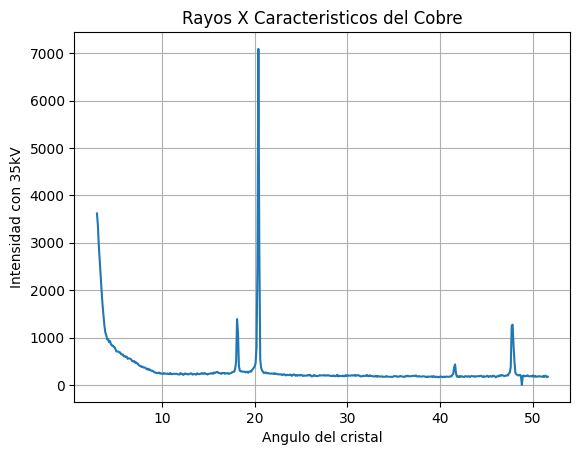

In [32]:
plt.plot(actividad1["Ángulo del crista"],actividad1['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Angulo del cristal')
plt.ylabel('Intensidad con 35kV')
plt.grid()
plt.show()

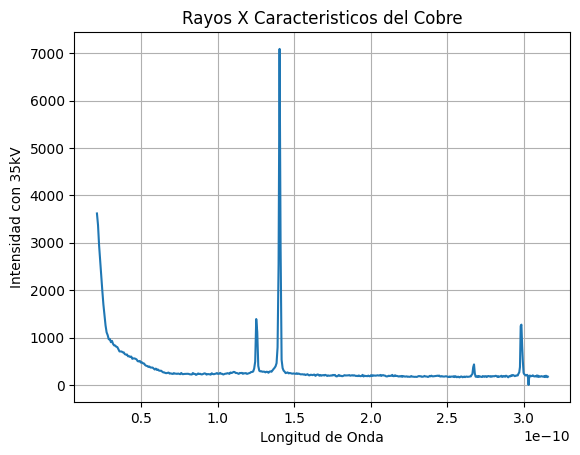

In [5]:
def ley_de_bragg(theta):
    d=2.014*10**(-10) #GUIA
    n=1 #ARBITRARIO
    lambda1=(2*d*np.sin(np.deg2rad(theta)))/n
    return lambda1
longitudes_de_onda=ley_de_bragg(actividad1['Ángulo del crista'])
plt.plot(longitudes_de_onda,actividad1['Tasa con 35kV'])
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.grid()
plt.show()

Ajuste lorentziano

Para Ka

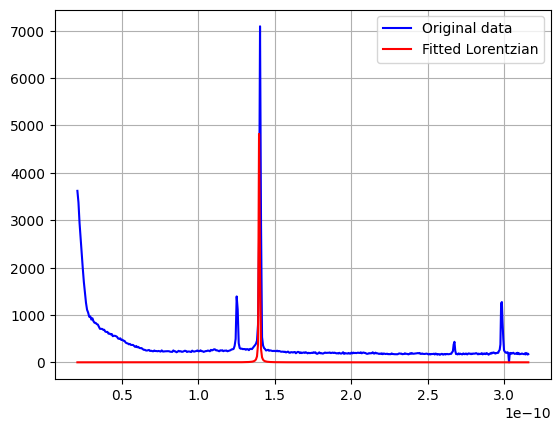

In [210]:
#Lorentziana
def lorentzian(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0)**2 + gamma**2))


picoKa=np.max(actividad1['Tasa con 35kV'])
x0 =1.4*10**(-10)
def fit_lorentzian(x, gamma):
    return lorentzian(x, picoKa, x0, gamma)

# Ajuste con curve_fit
initial_guess = [10**(-15)]  # Valor inicial para gamma
params, covariance = curve_fit(fit_lorentzian, longitudes_de_onda, actividad1['Tasa con 35kV'], p0=initial_guess)

# Extraer el valor de gamma ajustado
gamma_fit = params[0]




fit=fit_lorentzian(longitudes_de_onda,gamma_fit)
plt.plot(longitudes_de_onda, actividad1['Tasa con 35kV'], 'b', label='Original data')
plt.plot(longitudes_de_onda, fit, 'r-', label='Fitted Lorentzian')
plt.legend()
plt.grid()
plt.show()


Para Kb

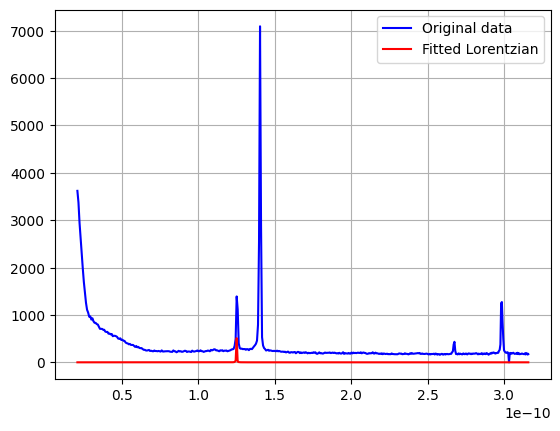

In [211]:
#Lorentziana
def lorentzian(x, A, x0, gamma):
    return (A / np.pi) * (gamma / ((x - x0)**2 + gamma**2))


picoKb=1390.
x0 = 1.25*10**(-10)

def fit_lorentzian(x, gamma):
    return lorentzian(x, picoKb, x0, gamma)

# Ajuste con curve_fit
initial_guess = [1*10**(-500)]  # Valor inicial para gamma
params, covariance = curve_fit(fit_lorentzian, longitudes_de_onda, actividad1['Tasa con 35kV'], p0=initial_guess)

# Extraer el valor de gamma ajustado
gamma_fit = params[0]

fit=fit_lorentzian(longitudes_de_onda,gamma_fit)
plt.plot(longitudes_de_onda, actividad1['Tasa con 35kV'], 'b', label='Original data')
plt.plot(longitudes_de_onda, fit, 'r-', label='Fitted Lorentzian')
plt.legend()
plt.grid()
plt.show()

Ajuste de Voigth

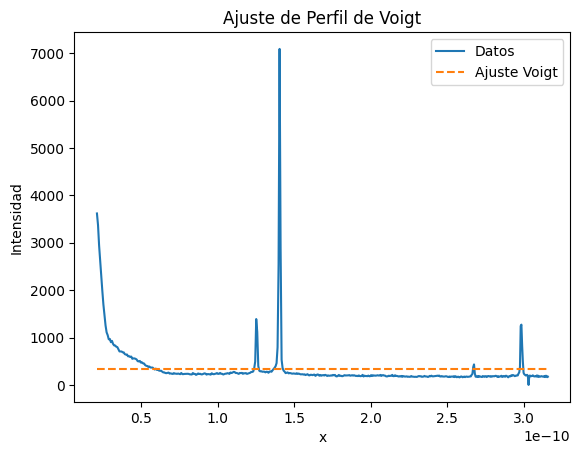

In [212]:
# Datos de ejemplo (reemplázalos con tus propios datos)
x_data = longitudes_de_onda
y_data = actividad1['Tasa con 35kV']

# Definir la función Voigt para el ajuste
def voigt(x, amplitude, center, sigma, gamma):
    return amplitude * voigt_profile(x - center, sigma, gamma)

# Adivinar parámetros iniciales para el ajuste
initial_guess = [1.0, 0.5, 1.0, 1.0*10**(-2)]

# Realizar el ajuste
params, params_covariance = curve_fit(voigt, x_data, y_data, p0=initial_guess)

# Parámetros ajustados
amplitude_fit, center_fit, sigma_fit, gamma_fit = params
"""
print(f"Amplitud ajustada: {amplitude_fit}")
print(f"Centro ajustado: {center_fit}")
print(f"Sigma ajustada: {sigma_fit}")
print(f"Gamma ajustada: {gamma_fit}")
"""
# Generar los valores ajustados con el perfil de Voigt ajustado
y_fit = voigt(x_data, *params)

# Graficar los datos y el ajuste
plt.plot(x_data, y_data, label='Datos')
plt.plot(x_data, y_fit, label='Ajuste Voigt', linestyle='--')
plt.legend()
plt.xlabel('x')
plt.ylabel('Intensidad')
plt.title('Ajuste de Perfil de Voigt')
plt.show()


ACTIVIDAD 2

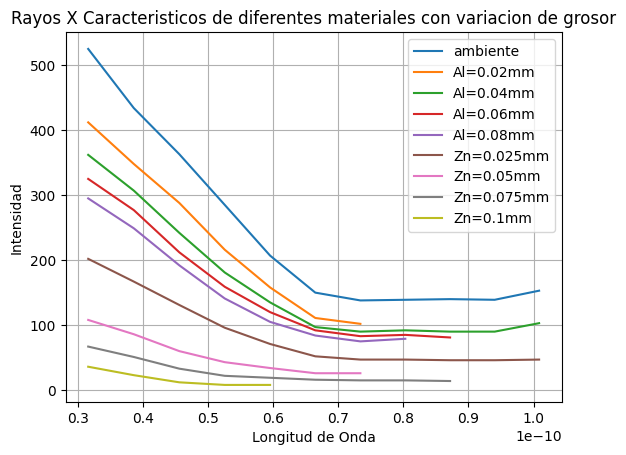

In [213]:
plt.plot()
plt.plot(ley_de_bragg(actividad2ambiente['Ángulo del crista']),actividad2ambiente['Tasa con 30kV'],label='ambiente')
plt.plot(ley_de_bragg(actividad2Al0_02['Ángulo del crista']),actividad2Al0_02['Tasa con 30kV'],label='Al=0.02mm')
plt.plot(ley_de_bragg(actividad2Al0_04['Ángulo del crista']),actividad2Al0_04['Tasa con 30kV'],label='Al=0.04mm')
plt.plot(ley_de_bragg(actividad2Al0_06['Ángulo del crista']),actividad2Al0_06['Tasa con 30kV'],label='Al=0.06mm')
plt.plot(ley_de_bragg(actividad2Al0_08['Ángulo del crista']),actividad2Al0_08['Tasa con 30kV'],label='Al=0.08mm')
plt.plot(ley_de_bragg(actividad2Zn0_025['Ángulo del crista']),actividad2Zn0_025['Tasa con 30kV'],label='Zn=0.025mm')
plt.plot(ley_de_bragg(actividad2Zn0_05['Ángulo del crista']),actividad2Zn0_05['Tasa con 30kV'],label='Zn=0.05mm')
plt.plot(ley_de_bragg(actividad2Zn0_075['Ángulo del crista']),actividad2Zn0_075['Tasa con 30kV'],label='Zn=0.075mm')
plt.plot(ley_de_bragg(actividad2Zn0_1['Ángulo del crista']),actividad2Zn0_1['Tasa con 30kV'],label='Zn=0.1mm')
plt.title('Rayos X Caracteristicos de diferentes materiales con variacion de grosor')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.show()

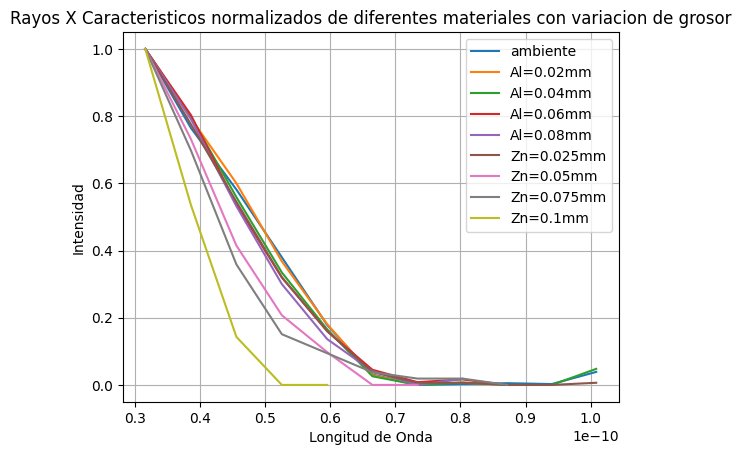

In [214]:
#normalizacion
def norm(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))
plt.plot()
plt.plot(ley_de_bragg(actividad2ambiente['Ángulo del crista']),norm(actividad2ambiente['Tasa con 30kV']),label='ambiente')
plt.plot(ley_de_bragg(actividad2Al0_02['Ángulo del crista']),norm(actividad2Al0_02['Tasa con 30kV']),label='Al=0.02mm')
plt.plot(ley_de_bragg(actividad2Al0_04['Ángulo del crista']),norm(actividad2Al0_04['Tasa con 30kV']),label='Al=0.04mm')
plt.plot(ley_de_bragg(actividad2Al0_06['Ángulo del crista']),norm(actividad2Al0_06['Tasa con 30kV']),label='Al=0.06mm')
plt.plot(ley_de_bragg(actividad2Al0_08['Ángulo del crista']),norm(actividad2Al0_08['Tasa con 30kV']),label='Al=0.08mm')
plt.plot(ley_de_bragg(actividad2Zn0_025['Ángulo del crista']),norm(actividad2Zn0_025['Tasa con 30kV']),label='Zn=0.025mm')
plt.plot(ley_de_bragg(actividad2Zn0_05['Ángulo del crista']),norm(actividad2Zn0_05['Tasa con 30kV']),label='Zn=0.05mm')
plt.plot(ley_de_bragg(actividad2Zn0_075['Ángulo del crista']),norm(actividad2Zn0_075['Tasa con 30kV']),label='Zn=0.075mm')
plt.plot(ley_de_bragg(actividad2Zn0_1['Ángulo del crista']),norm(actividad2Zn0_1['Tasa con 30kV']),label='Zn=0.1mm')
plt.title('Rayos X Caracteristicos normalizados de diferentes materiales con variacion de grosor')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.show()


In [215]:
#Haciendo el Fit
def log_model(x, a, b):
    return a * np.log(x) + b
params, params_covariance = curve_fit(log_model, actividad2ambiente['Ángulo del crista'], norm(actividad2ambiente['Tasa con 30kV']))
a_fit, b_fit = params
print('Ambiente')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Al0_02['Ángulo del crista'], norm(actividad2Al0_02['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.02mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Al0_04['Ángulo del crista'], norm(actividad2Al0_04['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.04mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Al0_06['Ángulo del crista'], norm(actividad2Al0_06['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.06mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Al0_08['Ángulo del crista'], norm(actividad2Al0_08['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.08mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Zn0_025['Ángulo del crista'], norm(actividad2Zn0_025['Tasa con 30kV']))
a_fit, b_fit = params
print('Zn 0.025mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Zn0_05['Ángulo del crista'], norm(actividad2Zn0_05['Tasa con 30kV']))
a_fit, b_fit = params
print('Zn 0.05mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Zn0_075['Ángulo del crista'], norm(actividad2Zn0_075['Tasa con 30kV']))
a_fit, b_fit = params
print('Al 0.075mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")
params, params_covariance = curve_fit(log_model, actividad2Zn0_1['Ángulo del crista'], norm(actividad2Zn0_1['Tasa con 30kV']))
a_fit, b_fit = params
print('Zn 0.12mm')
print(f"Coeficiente a ajustado: {a_fit}")
print(f"Coeficiente b ajustado: {b_fit}")



Ambiente
Coeficiente a ajustado: -0.8899240431229954
Coeficiente b ajustado: 2.2196995627355416
Al 0.02mm
Coeficiente a ajustado: -1.2682624800743953
Coeficiente b ajustado: 2.9316455204191434
Al 0.04mm
Coeficiente a ajustado: -0.8884116079266814
Coeficiente b ajustado: 2.212115892739476
Al 0.06mm
Coeficiente a ajustado: -1.0589589751892678
Coeficiente b ajustado: 2.533831817412669
Al 0.08mm
Coeficiente a ajustado: -1.1519858799111768
Coeficiente b ajustado: 2.696651967331191
Zn 0.025mm
Coeficiente a ajustado: -0.8888253997922827
Coeficiente b ajustado: 2.205883145657258
Zn 0.05mm
Coeficiente a ajustado: -1.2525278503406359
Coeficiente b ajustado: 2.8262900649255736
Al 0.075mm
Coeficiente a ajustado: -0.9636476952212683
Coeficiente b ajustado: 2.277782698620825
Zn 0.12mm
Coeficiente a ajustado: -1.6465097637863777
Coeficiente b ajustado: 3.3770143632833527


ACTIVIDAD 3 

Corriente constante

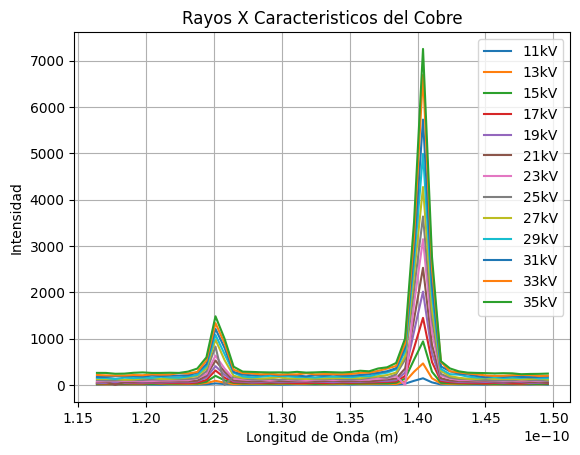

In [6]:
longitudes_de_onda=ley_de_bragg(actividad3a['?ngulo del crista'])
plt.plot(longitudes_de_onda,actividad3a['Tasa con 11kV'],label='11kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 13kV'],label='13kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 15kV'],label='15kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 17kV'],label='17kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 19kV'],label='19kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 21kV'],label='21kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 23kV'],label='23kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 25kV'],label='25kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 27kV'],label='27kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 29kV'],label='29kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 31kV'],label='31kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 33kV'],label='33kV')
plt.plot(longitudes_de_onda,actividad3a['Tasa con 35kV'],label='35kV')

plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda (m)')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.show()

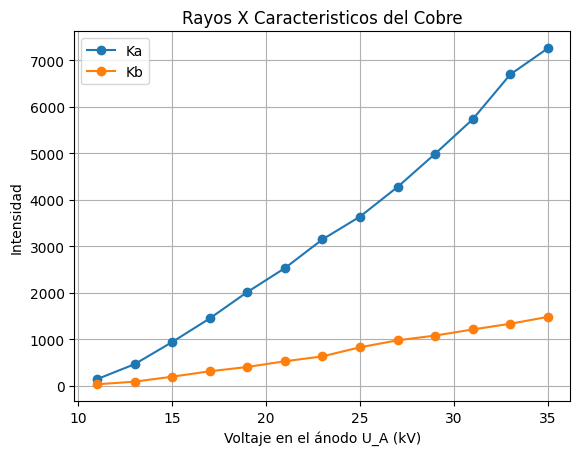

In [7]:
i_ka = 38
Ka=[]
i_kb = 15
Kb=[]

Ka11=actividad3a['Tasa con 11kV'][i_ka]
Ka.append([Ka11,11])
Ka13=actividad3a['Tasa con 13kV'][i_ka]
Ka.append([Ka13,13])
Ka15=actividad3a['Tasa con 15kV'][i_ka]
Ka.append([Ka15,15])
Ka17=actividad3a['Tasa con 17kV'][i_ka]
Ka.append([Ka17,17])
Ka19=actividad3a['Tasa con 19kV'][i_ka]
Ka.append([Ka19,19])
Ka21=actividad3a['Tasa con 21kV'][i_ka]
Ka.append([Ka21,21])
Ka23=actividad3a['Tasa con 23kV'][i_ka]
Ka.append([Ka23,23])
Ka25=actividad3a['Tasa con 25kV'][i_ka]
Ka.append([Ka25,25])
Ka27=actividad3a['Tasa con 27kV'][i_ka]
Ka.append([Ka27,27])
Ka29=actividad3a['Tasa con 29kV'][i_ka]
Ka.append([Ka29,29])
Ka31=actividad3a['Tasa con 31kV'][i_ka]
Ka.append([Ka31,31])
Ka33=actividad3a['Tasa con 33kV'][i_ka]
Ka.append([Ka33,33])
Ka35=actividad3a['Tasa con 35kV'][i_ka]
Ka.append([Ka35,35])
Kb11=actividad3a['Tasa con 11kV'][i_kb]
Kb.append([Kb11,11])
Kb13=actividad3a['Tasa con 13kV'][i_kb]
Kb.append([Kb13,13])
Kb15=actividad3a['Tasa con 15kV'][i_kb]
Kb.append([Kb15,15])
Kb17=actividad3a['Tasa con 17kV'][i_kb]
Kb.append([Kb17,17])
Kb19=actividad3a['Tasa con 19kV'][i_kb]
Kb.append([Kb19,19])
Kb21=actividad3a['Tasa con 21kV'][i_kb]
Kb.append([Kb21,21])
Kb23=actividad3a['Tasa con 23kV'][i_kb]
Kb.append([Kb23,23])
Kb25=actividad3a['Tasa con 25kV'][i_kb]
Kb.append([Kb25,25])
Kb27=actividad3a['Tasa con 27kV'][i_kb]
Kb.append([Kb27,27])
Kb29=actividad3a['Tasa con 29kV'][i_kb]
Kb.append([Kb29,29])
Kb31=actividad3a['Tasa con 31kV'][i_kb]
Kb.append([Kb31,31])
Kb33=actividad3a['Tasa con 33kV'][i_kb]
Kb.append([Kb33,33])
Kb35=actividad3a['Tasa con 35kV'][i_kb]
Kb.append([Kb35,35])

# Extraer las coordenadas x e y
x_ka = [punto[1] for punto in Ka]  # Lista de los valores x
y_ka = [punto[0] for punto in Ka]  # Lista de los valores y
x_kb = [punto[1] for punto in Kb]  # Lista de los valores x
y_kb = [punto[0] for punto in Kb]  # Lista de los valores y

# Crear el gráfico

plt.plot(x_ka, y_ka, 'o-', label='Ka')  # 'o-' para líneas con puntos
plt.plot(x_kb, y_kb, 'o-', label='Kb')  # 'o-' para líneas con puntos

plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Voltaje en el ánodo U_A (kV)')
plt.ylabel('Intensidad')
plt.grid()
plt.legend()
plt.show()


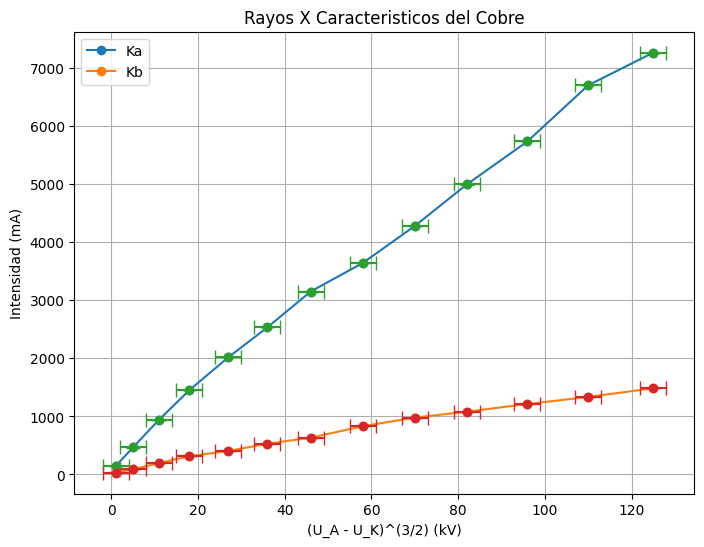

In [112]:
i_ka = 38
Ka=[]
i_kb = 15
Kb=[]

Ka11=actividad3a['Tasa con 11kV'][i_ka]
Ka.append([Ka11,(11-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka13=actividad3a['Tasa con 13kV'][i_ka]
Ka.append([Ka13,(13-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka15=actividad3a['Tasa con 15kV'][i_ka]
Ka.append([Ka15,(15-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka17=actividad3a['Tasa con 17kV'][i_ka]
Ka.append([Ka17,(17-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka19=actividad3a['Tasa con 19kV'][i_ka]
Ka.append([Ka19,(19-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka21=actividad3a['Tasa con 21kV'][i_ka]
Ka.append([Ka21,(21-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka23=actividad3a['Tasa con 23kV'][i_ka]
Ka.append([Ka23,(23-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka25=actividad3a['Tasa con 25kV'][i_ka]
Ka.append([Ka25,(25-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka27=actividad3a['Tasa con 27kV'][i_ka]
Ka.append([Ka27,(27-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka29=actividad3a['Tasa con 29kV'][i_ka]
Ka.append([Ka29,(29-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka31=actividad3a['Tasa con 31kV'][i_ka]
Ka.append([Ka31,(31-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka33=actividad3a['Tasa con 33kV'][i_ka]
Ka.append([Ka33,(33-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Ka35=actividad3a['Tasa con 35kV'][i_ka]
Ka.append([Ka35,(35-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb11=actividad3a['Tasa con 11kV'][i_kb]
Kb.append([Kb11,(11-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb13=actividad3a['Tasa con 13kV'][i_kb]
Kb.append([Kb13,(13-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb15=actividad3a['Tasa con 15kV'][i_kb]
Kb.append([Kb15,(15-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb17=actividad3a['Tasa con 17kV'][i_kb]
Kb.append([Kb17,(17-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb19=actividad3a['Tasa con 19kV'][i_kb]
Kb.append([Kb19,(19-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb21=actividad3a['Tasa con 21kV'][i_kb]
Kb.append([Kb21,(21-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb23=actividad3a['Tasa con 23kV'][i_kb]
Kb.append([Kb23,(23-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb25=actividad3a['Tasa con 25kV'][i_kb]
Kb.append([Kb25,(25-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb27=actividad3a['Tasa con 27kV'][i_kb]
Kb.append([Kb27,(27-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb29=actividad3a['Tasa con 29kV'][i_kb]
Kb.append([Kb29,(29-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb31=actividad3a['Tasa con 31kV'][i_kb]
Kb.append([Kb31,(31-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb33=actividad3a['Tasa con 33kV'][i_kb]
Kb.append([Kb33,(33-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])
Kb35=actividad3a['Tasa con 35kV'][i_kb]
Kb.append([Kb35,(35-9.979)**(3/2),0.5*(3/2)*(35-9.979)**(1/2)])

# Extraer las coordenadas x e y
x_ka = [int(punto[1]) for punto in Ka]  # Lista de los valores x
y_ka = [int(punto[0]) for punto in Ka]  # Lista de los valores y
x_kb = [int(punto[1]) for punto in Kb]  # Lista de los valores x
y_kb = [int(punto[0]) for punto in Kb]  # Lista de los valores y
error_kb = [int(punto[2]) for punto in Kb]
error_ka = [int(punto[2]) for punto in Ka]

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(x_ka, y_ka, 'o-', label='Ka')  # 'o-' para líneas con puntos
plt.plot(x_kb, y_kb, 'o-', label='Kb')  # 'o-' para líneas con puntos
plt.errorbar(x_ka, y_ka, yerr=1, xerr=error_ka, fmt='o', capsize=5)
plt.errorbar(x_kb, y_kb, yerr=1, xerr=error_kb, fmt='o', capsize=5)
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('(U_A - U_K)^(3/2) (kV)')
plt.ylabel('Intensidad (mA)')
plt.grid()
plt.legend()
plt.show()




In [99]:

# Realizar el ajuste lineal
slope, intercept_ka, r_value, p_value, std_err = linregress(x_ka, y_ka)
b_ka = slope  # La pendiente es el valor de b que queremos hallar
slope, intercept_kb, r_value, p_value, std_err = linregress(x_kb, y_kb)
b_kb = slope  # La pendiente es el valor de b que queremos hallar

print(f"El valor de la constante b para el pico característico K_a es: {b_ka}")
print(f"El valor de la constante b para el pico característico K_b es: {b_kb}")





El valor de la constante b para el pico característico K_a es: 56.82596084391742
El valor de la constante b para el pico característico K_b es: 11.769265785830378


Voltaje constante

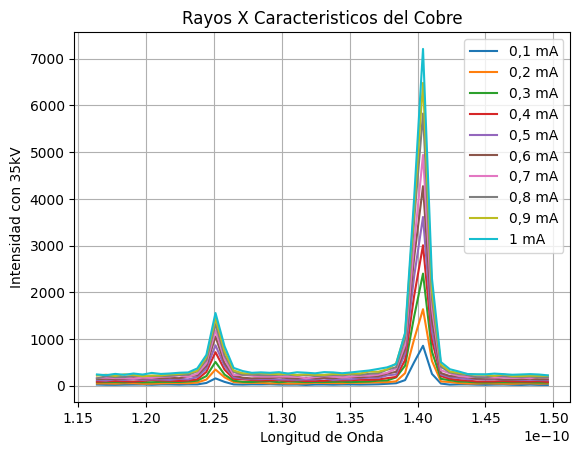

In [165]:
longitudes_de_onda=ley_de_bragg(actividad3b_01['ﾁngulo del crista'])
plt.plot(longitudes_de_onda,actividad3b_01['Tasa con 35kV'],label='0,1 mA')
plt.plot(longitudes_de_onda,actividad3b_02['Tasa con 35kV'],label='0,2 mA')
plt.plot(longitudes_de_onda,actividad3b_03['Tasa con 35kV'],label='0,3 mA')
plt.plot(longitudes_de_onda,actividad3b_04['Tasa con 35kV'],label='0,4 mA')
plt.plot(longitudes_de_onda,actividad3b_05['Tasa con 35kV'],label='0,5 mA')
plt.plot(longitudes_de_onda,actividad3b_06['Tasa con 35kV'],label='0,6 mA')
plt.plot(longitudes_de_onda,actividad3b_07['Tasa con 35kV'],label='0,7 mA')
plt.plot(longitudes_de_onda,actividad3b_08['Tasa con 35kV'],label='0,8 mA')
plt.plot(longitudes_de_onda,actividad3b_09['Tasa con 35kV'],label='0,9 mA')
plt.plot(longitudes_de_onda,actividad3b_1['Tasa con 35kV'],label='1 mA')

plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.legend()
plt.grid()
plt.show()

1.0241056274467935


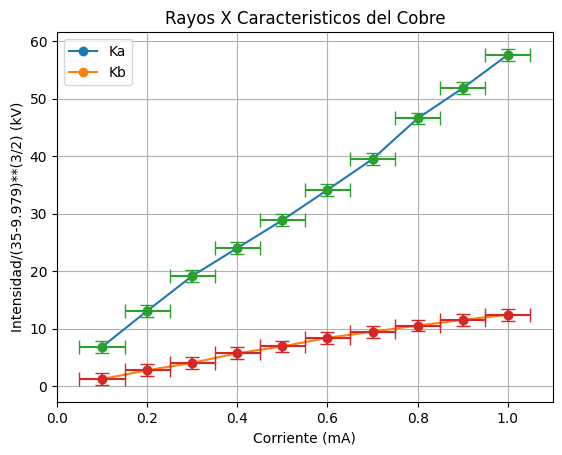

In [111]:
i_ka = 38
Ka=[]
i_kb = 15
Kb=[]

Ka01=actividad3b_01['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka01,0.1])
Ka02=actividad3b_02['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka02,0.2])
Ka03=actividad3b_03['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka03,0.3])
Ka04=actividad3b_04['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka04,0.4])
Ka05=actividad3b_05['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka05,0.5])
Ka06=actividad3b_06['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka06,0.6])
Ka07=actividad3b_07['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka07,0.7])
Ka08=actividad3b_08['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka08,0.8])
Ka09=actividad3b_09['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka09,0.9])
Ka1=actividad3b_1['Tasa con 35kV'][i_ka]/((35-9.979)**(3/2))
Ka.append([Ka1,1])

Kb01=actividad3b_01['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb01,0.1])
Kb02=actividad3b_02['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb02,0.2])
Kb03=actividad3b_03['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb03,0.3])
Kb04=actividad3b_04['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb04,0.4])
Kb05=actividad3b_05['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb05,0.5])
Kb06=actividad3b_06['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb06,0.6])
Kb07=actividad3b_07['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb07,0.7])
Kb08=actividad3b_08['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb08,0.8])
Kb09=actividad3b_09['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb09,0.9])
Kb1=actividad3b_1['Tasa con 35kV'][i_kb]/((35-9.979)**(3/2))
Kb.append([Kb1,1])

# Extraer las coordenadas x e y
x_ka = [punto[1] for punto in Ka]  # Lista de los valores x
y_ka = [punto[0] for punto in Ka]  # Lista de los valores y
x_kb = [punto[1] for punto in Kb]  # Lista de los valores x
y_kb = [punto[0] for punto in Kb]  # Lista de los valores y
yerror = np.sqrt((1/(35-9.979)**3)+np.log10((35-9.979)**(3/2))*0.5)
print(yerror)
# Crear el gráfico

plt.plot(x_ka, y_ka, 'o-', label='Ka')  # 'o-' para líneas con puntos
plt.plot(x_kb, y_kb, 'o-', label='Kb')  # 'o-' para líneas con puntos
plt.errorbar(x_ka, y_ka, yerr=yerror, xerr=0.05, fmt='o', capsize=5)
plt.errorbar(x_kb, y_kb, yerr=yerror, xerr=0.05, fmt='o', capsize=5)
plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Corriente (mA)')
plt.ylabel('Intensidad/(35-9.979)**(3/2) (kV)')
plt.grid()
plt.legend()
plt.show()

Calculo de b con voltaje fijo 

In [21]:
# Realizar el ajuste lineal
slope, intercept, r_value, p_value, std_err = linregress(x_ka, y_ka)
b_ka = slope  # La pendiente es el valor de b que queremos hallar
slope, intercept, r_value, p_value, std_err = linregress(x_kb, y_kb)
b_kb = slope  # La pendiente es el valor de b que queremos hallar
#Las unidades para b en este caso son de kV^-2/3
print(f"El valor de la constante b para el pico característico K_a es: {b_ka}")
print(f"El valor de la constante b para el pico característico K_b es: {b_kb}")

El valor de la constante b para el pico característico K_a es: 55.540670727545276
El valor de la constante b para el pico característico K_b es: 12.543222524177663



ACTIVIDAD 4

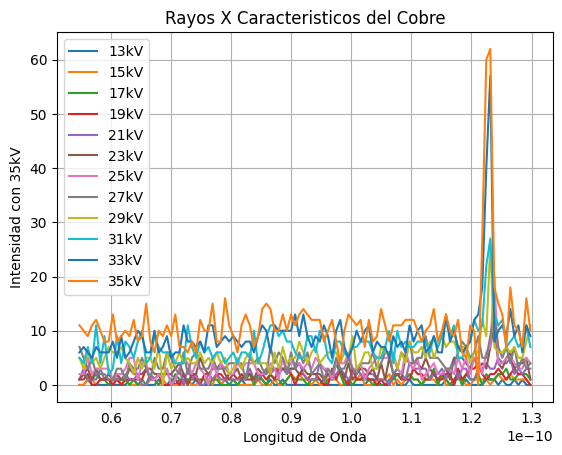

In [37]:
longitudes_de_onda=ley_de_bragg(actividad4['?ngulo del crista'])

plt.plot(longitudes_de_onda,actividad4['Tasa con 13kV'],label='13kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 15kV'],label='15kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 17kV'],label='17kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 19kV'],label='19kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 21kV'],label='21kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 23kV'],label='23kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 25kV'],label='25kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 27kV'],label='27kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 29kV'],label='29kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 31kV'],label='31kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 33kV'],label='33kV')
plt.plot(longitudes_de_onda,actividad4['Tasa con 35kV'],label='35kV')

plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('Longitud de Onda')
plt.ylabel('Intensidad con 35kV')
plt.legend()
plt.grid()
plt.show()

C:\Users\yeife\AppData\Local\Temp\ipykernel_11712\3456001027.py:41: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


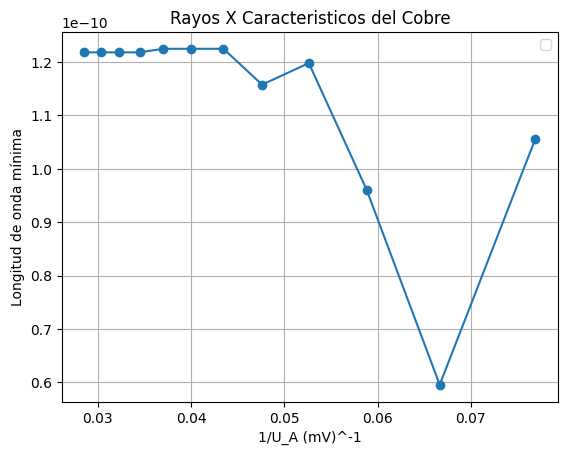

In [54]:


lambda_min=[]

lm13=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 13kV'])])
lambda_min.append([lm13,1/13])
lm15=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 15kV'])])
lambda_min.append([lm15,1/15])
lm17=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 17kV'])])
lambda_min.append([lm17,1/17])
lm19=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 19kV'])])
lambda_min.append([lm19,1/19])
lm21=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 21kV'])])
lambda_min.append([lm21,1/21])
lm23=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 23kV'])])
lambda_min.append([lm23,1/23])
lm25=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 25kV'])])
lambda_min.append([lm25,1/25])
lm27=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 27kV'])])
lambda_min.append([lm27,1/27])
lm29=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 29kV'])])
lambda_min.append([lm29,1/29])
lm31=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 31kV'])])
lambda_min.append([lm31,1/31])
lm33=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 33kV'])])
lambda_min.append([lm33,1/33])
lm35=ley_de_bragg(actividad4['?ngulo del crista'][np.argmax(actividad4['Tasa con 35kV'])])
lambda_min.append([lm35,1/35])

# Extraer las coordenadas x e y
x_lm = [punto[1] for punto in lambda_min]  # Lista de los valores x
y_lm = [punto[0] for punto in lambda_min]  # Lista de los valores y


# Crear el gráfico

plt.plot(x_lm, y_lm, 'o-')  # 'o-' para líneas con puntos

plt.title('Rayos X Caracteristicos del Cobre')
plt.xlabel('1/U_A (mV)^-1')
plt.ylabel('Longitud de onda mínima')
plt.grid()
plt.legend()
plt.show()

La longitud de onda mínima donde comienza el Bremsstrahlung es: 5.4666232576537804e-11


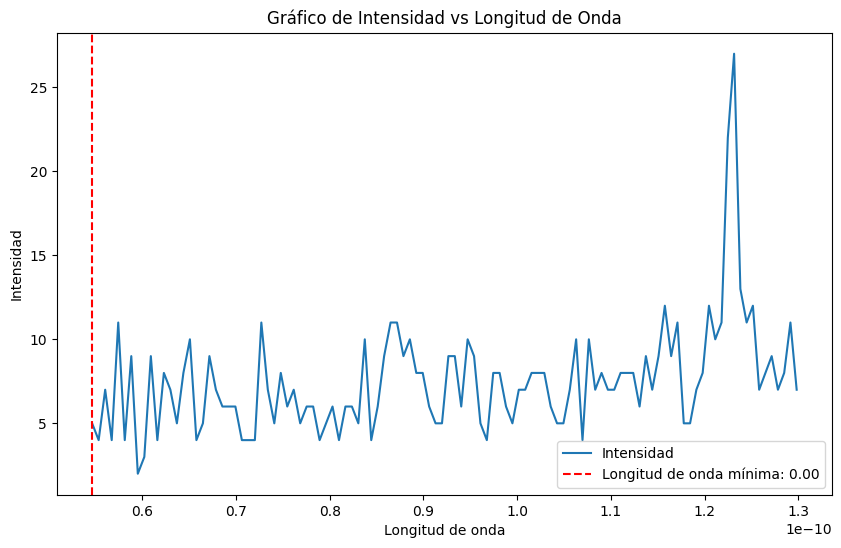

In [52]:

# Encuentra la primera derivada de la intensidad respecto a la longitud de onda
derivada_intensidad = np.gradient(actividad4['Tasa con 35kV'], ley_de_bragg(actividad4['?ngulo del crista']))

# Encuentra el índice donde la derivada es mayor que un umbral (inicio del aumento notable)
umbral = 0.01  # Ajusta este valor según tu caso específico
indices_aumento = np.where(derivada_intensidad > umbral)[0]

# Verifica que existan valores que cumplan con la condición
if len(indices_aumento) > 0:
    indice_minimo = indices_aumento[0]
    longitud_onda_minima = ley_de_bragg(actividad4['?ngulo del crista'])[indice_minimo]
    print(f"La longitud de onda mínima donde comienza el Bremsstrahlung es: {longitud_onda_minima}")
else:
    print("No se detectó un aumento significativo en la intensidad.")

# Gráfico de la intensidad vs longitud de onda
plt.figure(figsize=(10, 6))
plt.plot(ley_de_bragg(actividad4['?ngulo del crista']), actividad4['Tasa con 31kV'], label='Intensidad')
plt.axvline(x=longitud_onda_minima, color='r', linestyle='--', label=f'Longitud de onda mínima: {longitud_onda_minima:.2f}')
plt.xlabel('Longitud de onda')
plt.ylabel('Intensidad')
plt.title('Gráfico de Intensidad vs Longitud de Onda')
plt.legend()
plt.show()
